In [22]:
import h5py
import glob
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import scipy as sp
from scipy.optimize import curve_fit
from lmfit.models import LinearModel, LorentzianModel, GaussianModel, ExponentialModel

In [23]:
# reading h5 file
f = h5py.File("20190518_173944_projection-Copy1.h5")
list(f.keys())
shots = f.get("n-shots")
photE = f.get("x-axis")
intense = f.get("y-axis")
spectrum = range(0,len(intense[:,1]-1))

In [50]:
b = 41
# reduce resolution, allowing for simpler minima finding
dataset_x = photE[0:len(photE):100]
dataset_y = intense[b,0:len(intense[b,:]):100]

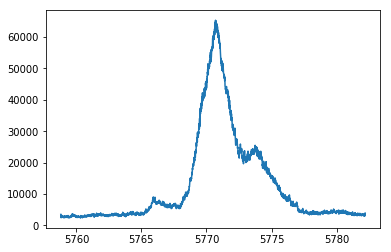

In [51]:
plt.plot(photE,intense[b,:])

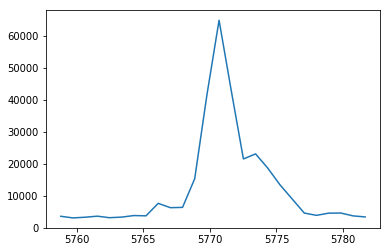

In [52]:
plt.plot(dataset_x,dataset_y)

In [53]:
peaks = sp.signal.find_peaks(dataset_y, height=None, 
                        threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=None)
peaks = peaks[0]
widths_sp = sp.signal.peak_widths(dataset_y, peaks=peaks)[0]

In [54]:
def minimafinder(data_x,data_y):
    k = 0
    mins = []
    while k < len(data_y)-1:
        if (data_y[k] < data_y[k-1]) and (data_y[k] < data_y[k+1]):
            mins.append(data_x[k])
        k = k+1
    return mins

# slicing function - compares slicing points from minima finder with actual points in full dataset
def slicing(minims):
    m = 0
    slices = []
    while m < len(photE):
        j=0
        while j < len(minims):
            if minims[j] == photE[m]:
                slices.append(m)
            j = j+1
        m = m+1
    return slices

In [55]:
minima = np.array(minimafinder(dataset_x,dataset_y))
print(minima)
data_slices = slicing(minima)

[5759.7144197  5762.45767878 5765.20093787 5767.02977726 5772.51629543
 5778.0028136 ]


FWHM width of peak 0 :  4.639241584316119
FWHM width of peak 1 :  4.6390132962520445
FWHM width of peak 2 :  4.612255984830912
FWHM width of peak 3 :  4.427772973180225
FWHM width of peak 4 :  16.83483747698598
FWHM width of peak 5 :  7.454985737064794
[4.639241584316119, 4.6390132962520445, 4.612255984830912, 4.427772973180225, 16.83483747698598, 7.454985737064794]


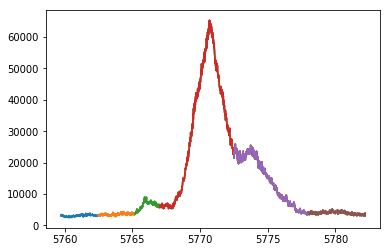

In [57]:
i = 0
fwhm = []
while i < len(data_slices):
    if i == len(data_slices) - 1:
        globals()['peak_x%i' % i] = photE[data_slices[i]:]
        globals()['peak_y%i' % i] = intense[b,data_slices[i]:]
    else:
        globals()['peak_x%i' % i] = photE[data_slices[i]:data_slices[i+1]]
        globals()['peak_y%i' % i] = intense[b,data_slices[i]:data_slices[i+1]]
    plt.plot(photE[data_slices[i]:],intense[b,data_slices[i]:])
    
    mod = GaussianModel()

    pars = mod.guess(intense[b,data_slices[i]:], x=photE[data_slices[i]:])
    out = mod.fit(intense[b,data_slices[i]:], pars, x=photE[data_slices[i]:])
    fwhm.append(out.params['fwhm'].value)
    print("FWHM width of peak", i,": ",out.params['fwhm'].value)
    
    i = i + 1
print(fwhm)